In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [15]:
#Our data is not using the default encoding (utf-8) so we make sure to specify the correct encoding when reading the file
data = pd.read_csv('volcdata.csv', encoding = 'unicode_escape', engine ='python')
data = data.dropna(subset=['Longitude'])
data = data.dropna(subset=['Total Deaths'])
#data = data.dropna(subset=['No Affected'])

In [16]:
print(np.array(data['Longitude']))

['61.17W' '75.316W' '91.552W' '112.308E' '150.383E' ' 10.288E' ' 115.508E'
 '61.18W' '110.446E' '120.994E' '110.446E' '110.446E' '91.552W' '76.63W'
 '112.308E' '102.251W' '14.426' '120.35 E' '152.203E' '124.666E' '90.880W'
 '105.423E' '120.994E' '110.446E' '29' '29.25' '123.7 E' '137.48'
 '110.4 E' '130.3 E' '112.3 E' '98.392' '62.14 W' '14.426' '98.38 W'
 '-76.03' '77.4 W' '15.004' '112.308' '112.9 E' '-78.442' '152.203'
 '40.82' '145.037' '127.33' '106 E' '-89.63' '-78.436' '86.7 W' '130.3 E'
 '110.26 E' '98.392']


In [17]:
def convert_longitude(longitude):
    
    if longitude[-1]=='W':
        numeric_part= -float(longitude[:-1].strip())
    elif longitude[-1] == 'E':
        numeric_part= float(longitude[:-1].strip())
    else:
         numeric_part= float(longitude.strip())
            
    # Normalize the longitude value to be between -180 and 180
    while numeric_part > 180:
        numeric_part -= 360
    while numeric_part < -180:
        numeric_part += 360

    return numeric_part

def convert_latitude(latitude):
    # Strip any extra spaces and split by non-numeric characters
    if latitude[-1]=='S':
        numeric_part= -float(latitude[:-1].strip())
    elif latitude[-1] == 'N':
        numeric_part= float(latitude[:-1].strip())
    else:
         numeric_part= float(latitude.strip())
    
    # Normalize the latitude value to be between -90 and 90
    numeric_part = max(min(numeric_part, 90), -90)

    return numeric_part

In [18]:
lon = [convert_longitude(lon) for lon in data['Longitude']]
print(lon)

lat = [convert_latitude(lat) for lat in data['Latitude']]
print(lat)

death = list(data['Total Deaths']/25)
print(death)

#affected = list(data['No Affected']/2500)
#print(affected)

[-61.17, -75.316, -91.552, 112.308, 150.383, 10.288, 115.508, -61.18, 110.446, 120.994, 110.446, 110.446, -91.552, -76.63, 112.308, -102.251, 14.426, 120.35, 152.203, 124.666, -90.88, 105.423, 120.994, 110.446, 29.0, 29.25, 123.7, 137.48, 110.4, 130.3, 112.3, 98.392, -62.14, 14.426, -98.38, -76.03, -77.4, 15.004, 112.308, 112.9, -78.442, 152.203, 40.82, 145.037, 127.33, 106.0, -89.63, -78.436, -86.7, 130.3, 110.26, 98.392]
[14.82, 4.895, 14.757, -7.937, -5.035, 6.441, -8.342, 13.81, -7.54, 14.002, -7.54, -7.54, 14.757, 2.32, -7.937, 19.492, 40.821, 15.13, -4.21, 9.2, 14.473, -6.102, 14.002, -7.54, 1.0, -1.52, 13.3, 35.893, -7.5, 32.75, -7.9, 3.17, 16.45, 40.821, 19.02, 2.93, 1.2, 37.734, -7.93, -8.1, -1.467, -4.271, 12.17, -4.08, 0.8, -6.3, 13.852846, -0.677, 12.5, 32.75, -7.32, 3.17]
[1200.0, 872.0, 240.0, 200.0, 120.0, 69.84, 63.36, 62.6, 54.76, 53.4, 52.0, 52.0, 40.0, 40.0, 40.0, 40.0, 28.0, 25.6, 20.24, 20.0, 18.44, 18.12, 14.2, 12.88, 8.0, 5.88, 3.16, 2.52, 2.32, 1.72, 1.32, 1.28,

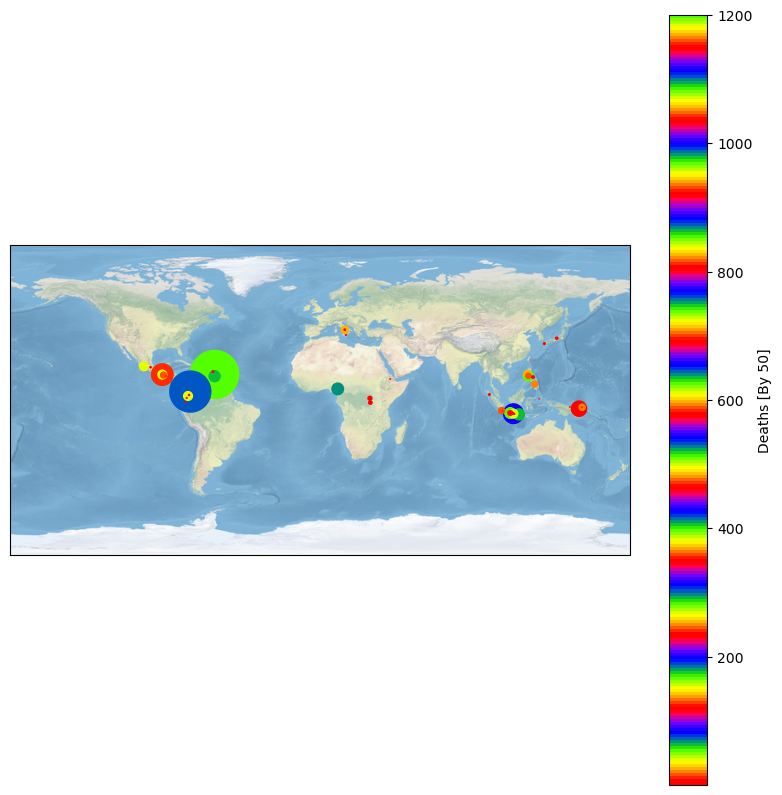

In [19]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()


#ax.coastlines()

cmap = plt.get_cmap('prism')
norm = plt.Normalize(vmin=min(death), vmax=max(death))

sc = ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(), c=death, cmap=cmap, norm=norm, marker='o')


#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Deaths [By 50]')

plt.show()

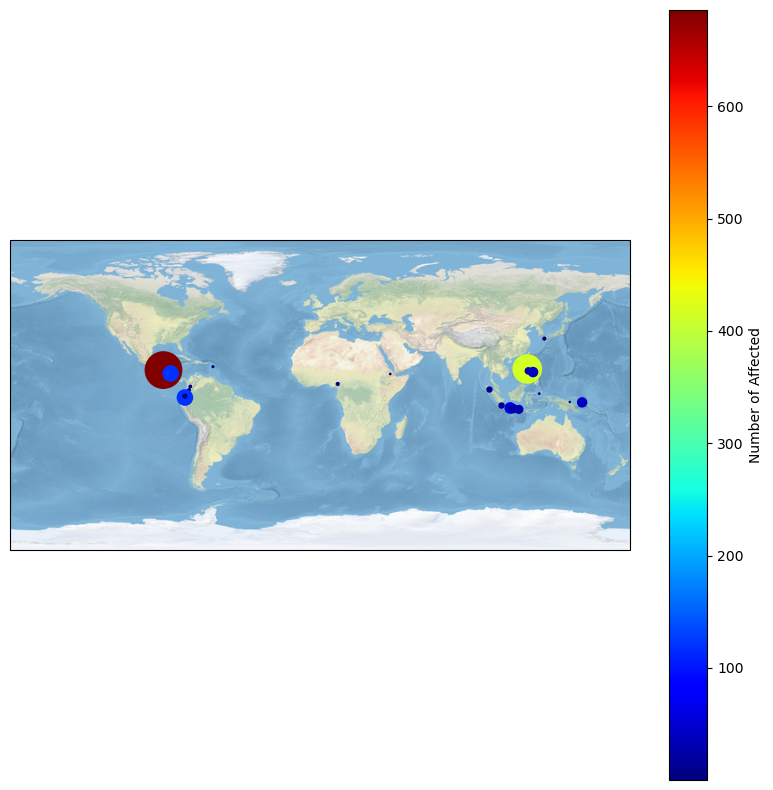

In [166]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()


#ax.coastlines()

cmap = plt.get_cmap('jet')
norm = plt.Normalize(vmin=min(affected), vmax=max(affected))

sc = ax.scatter(lon,lat, affected, transform=ccrs.PlateCarree(), c=affected, cmap=cmap, norm=norm, marker='o')


#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Number of Affected')

plt.show()

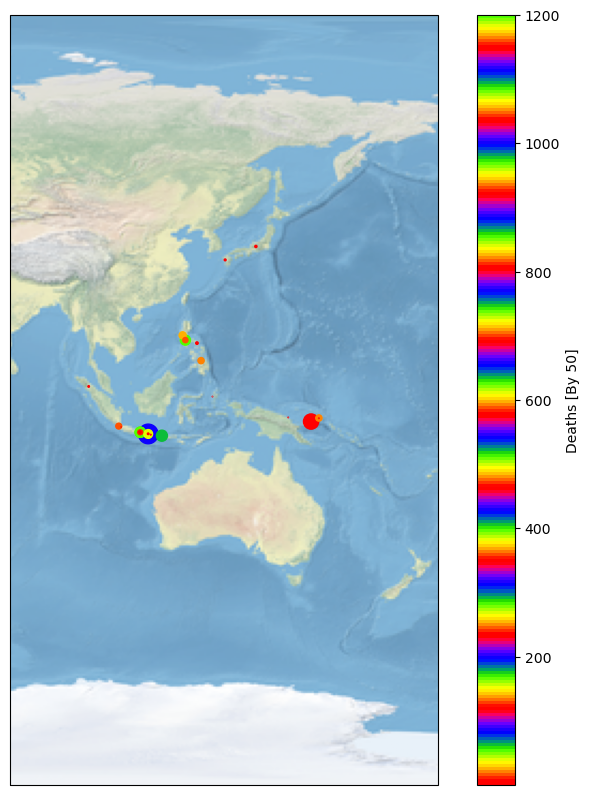

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()


#ax.coastlines()

cmap = plt.get_cmap('prism')
norm = plt.Normalize(vmin=min(death), vmax=max(death))

sc = ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(), c=death, cmap=cmap, norm=norm, marker='o')


#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

center_lon = 0
center_lat = 80

# Create a Cartopy map using a specific projection (e.g., PlateCarree)
#fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent of the map to the desired bounding box
extent = [-280, 180, -280, 120]  # Adjust these values as needed
ax.set_extent(extent, crs=ccrs.PlateCarree())



cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Deaths [By 50]')

plt.show()